<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.4 Logistic Regression**
**Logistic regression** is a data analysis technique used to model the relationship between a binary dependent variable and one or more independent variables.

In logisitic regression, the **logit function** is the function that links probabilities to log-odds, thus transforming probabilites, which are bounded between 0 and 1, into an unbounded scale. This makes it easier to model relationships linearly. Mathematically, the logit function is the natural logarithm of the odds ratio, a ratio where the probability of success is divided by the probability of failure.

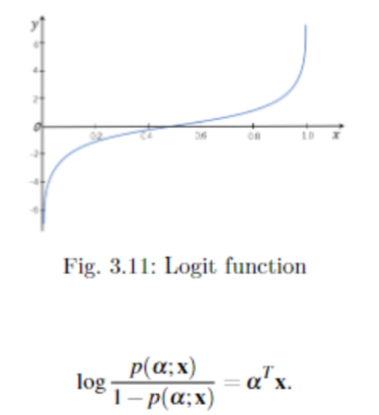



Logistic regression uses the **sigmoid function**, which receives any real-valued number and maps it to a value between 0 and 1. This allows logistic regression to estimate the probability that a given input belongs to a particular class. The sigmoid function is:

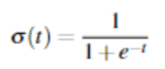

The following program uses a dataset that contains the medical records for Pima Indian females over the age of 21. By implementing a logistic regression model, we can determine if a patient will have diabetes or not based on characteristics such as the number of pregnancies they've had, their blood glucose level, their blood pressure, etc.

Accuracy: 0.7359307359307359

Confusion Matrix:
 [[120  31]
 [ 30  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



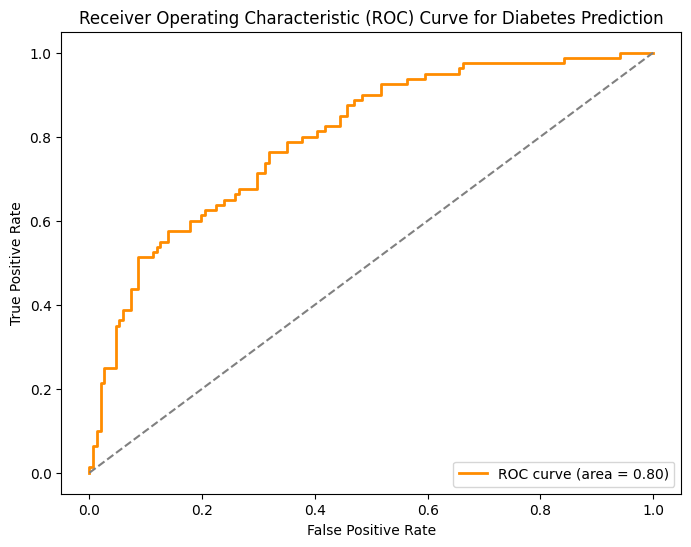

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# select features and target model
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#determine model accuracy metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Diabetes Prediction')
plt.legend(loc="lower right")
plt.show()






Here, our model has a accuracy of 74% and an **Area Under the Curve** (AUC) of 80%. AUC summarizes the performance of our binary classifier across all possible classification thresholds.

Logistic regression is commonly used for preduction and classification problems. Some examples of this include:
1. **Fraud detection**: Models can identify data abnormalities which are predictive of fraud.
2. **Disease prediction**: Models can predict the likelihood of disease or illness for a given population, which can allow healthcare organizations to focus preventative care initiatives on the most susceptible populations.
3. **Churn prediction**: Models can determine which customers are most likely to stop paying for a service and take their business elsewhere, which can inform retension strategies.